# 准备工作与数据加载

加载所有需要的包

In [1]:
import pandas as pd
import numpy as np
import os
import datetime

from mysystem.factor_test import internal_data_loader, factor_constructor, factor_test
from mysystem import managing
from mysystem.portfolio_test import portfolio_backtest, portfolio_construct

欢迎使用回测系统
因子全部处于正常状态，没有新的消息


加载内部数据

In [2]:
fin_stat = internal_data_loader.load_3sheets()
pctdf,data = internal_data_loader.load_processed_prices()

# Secton 1. 因子研究

对五日反转策略进行回测，默认显示简略的回测结果，这里我们使用可选参数要求在指定时间区间上回测

In [3]:
def rolling5(df):
    return df['pct'].rolling(5).mean()

factor = factor_constructor.get_price_factor(data,rolling5,startdate='20200605',enddate='20220401')
returns = factor_test.single_factor_backtest(pctdf,factor,num_bins=5)

factor_test.show(returns)

正在计算量价因子
当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
正在计算分组收益
正在计算IC
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-3.858676,15.769597,-0.244691,21.042493


多头超额:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-10.585323,9.228393,-1.147039,20.303862


纯多头：


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-7.394605,20.438452,-0.361799,32.785617


IC相关数据：


,RankIC均值,RankIC标准差,IC均值,IC标准差,T统计量,显著性水平(p-value)
数值,-0.004214,0.11709,0.009188,0.118025,1.638457,0.051018


尝试向因子库提交因子，会读取config.ini，根据其中的相关性和夏普率作出判断，是否符合要求

In [4]:
factor_test.submit(factor,returns,'momentum','动量因子:移动五日平均')

正在检验相关性和收益情况
最大相关性:0.000
收益过低！拒绝入库


在show函数中，使用“detailed=True”  要求系统展示更详细的回测结果

多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-3.858676,15.769597,-0.244691,21.042493


多头超额:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-10.585323,9.228393,-1.147039,20.303862


纯多头：


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-7.394605,20.438452,-0.361799,32.785617


IC相关数据：


,RankIC均值,RankIC标准差,IC均值,IC标准差,T统计量,显著性水平(p-value)
数值,-0.004214,0.11709,0.009188,0.118025,1.638457,0.051018


多空组合逐月收益：


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,nan,nan,nan,nan,nan,-0.000068,0.000565,-0.000573,-0.002440,0.000924,0.000964,0.002262
2021,0.001032,0.000805,-0.001986,0.000084,-0.001271,-0.000499,0.001395,-0.000021,-0.001700,0.000282,-0.001146,-0.001033
2022,-0.001535,-0.001039,0.001155,0.010851,nan,nan,nan,nan,nan,nan,nan,nan


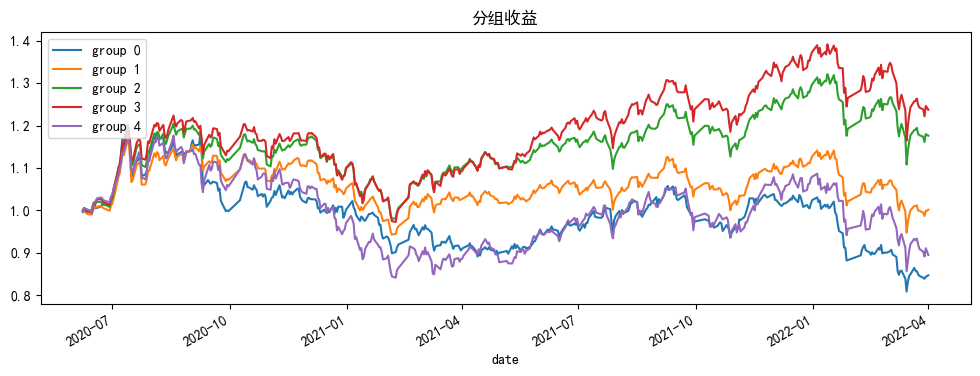

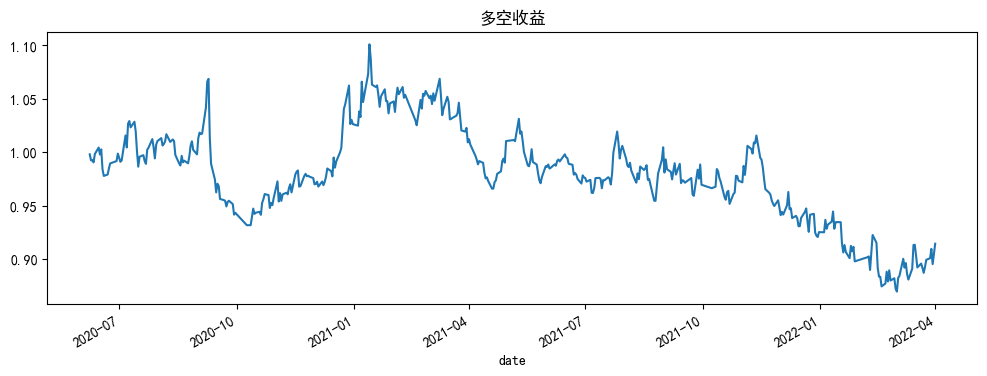

In [5]:
factor_test.show(returns.fillna(0),detailed=True)

对基本面因子进行回测，取商誉与利润相除作为因子(我们认为计提商誉较低的公司财务更“诚实”)

In [6]:
ratio = - factor_constructor.get_finstat_factor(fin_stat,'商誉',pctdf) / factor_constructor.get_finstat_factor(fin_stat,'利润总额',pctdf)

returns = factor_test.single_factor_backtest(pctdf,ratio,num_bins=5)

factor_test.show(returns)

正在计算分组收益
正在计算IC
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,9.94374,20.871129,0.476435,18.530792


多头超额:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,1.388447,13.013305,0.106694,20.875504


纯多头：


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-2.229551,26.876723,-0.082955,40.252803


IC相关数据：


,RankIC均值,RankIC标准差,IC均值,IC标准差,T统计量,显著性水平(p-value)
数值,0.001703,0.181152,0.009016,0.205233,1.144689,0.126371


尝试向因子库提交

In [7]:
factor_test.submit(ratio,returns,'fin_stat_0','低商誉计提')

正在检验相关性和收益情况
最大相关性:0.000
Submit Success


一站式服务，忽略内部所有细节，直接用wrapup_test单个函数完成回测

In [8]:
def volume(df):
    return -df['volume'].rolling(66).mean()

factor, results = factor_test.wrapup_test(pctdf,data,volume,require_returns=True)

正在计算量价因子
当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
正在计算分组收益
正在计算IC
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,16.744302,12.185093,1.374163,10.971912


多头超额:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,4.425666,5.758672,0.768522,7.034646


纯多头：


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,5.926787,20.078463,0.295181,34.897385


IC相关数据：


,RankIC均值,RankIC标准差,IC均值,IC标准差,T统计量,显著性水平(p-value)
数值,0.007002,0.094606,0.006092,0.071116,2.20416,0.013928


In [9]:
factor_test.submit(factor,results,'volume','成交量')

正在检验相关性和收益情况
最大相关性:0.164
Submit Success


尝试重复提交

In [10]:
factor_test.submit(factor,results,'volume','成交量')

正在检验相关性和收益情况
最大相关性:1.000
相关性过高！拒绝入库


CTA策略回测: 双均线 金叉/死叉 要求展示详细回测结果

正在计算量价因子
当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,5.603246,11.057119,0.506755,14.90248


多空组合逐月收益：


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,0.000000,0.000000,0.000000,0.000084,-0.000117,-0.000043,-0.001032,-0.000878,0.000681,-0.001466,0.001211,-0.001007
2021,-0.002087,0.002450,0.000609,0.000688,-0.000467,-0.000214,-0.001426,-0.000375,0.001767,0.000296,0.002504,0.000490
2022,0.001642,0.000135,-0.001560,-0.004230,0.004323,0.001054,-0.000955,0.001577,-0.001405,0.001576,0.002858,0.001126


正在检验相关性和收益情况
最大相关性:0.188
Submit Success


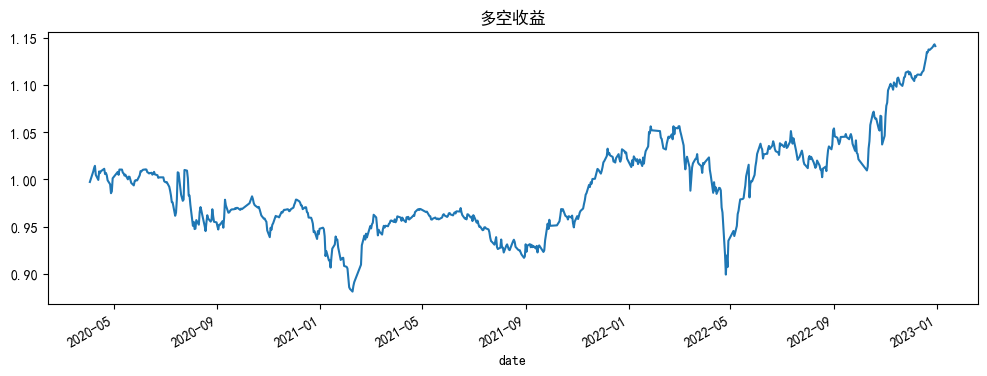

In [11]:
def mean2060(x):
    return - x['close'].rolling(20).mean() + x['close'].rolling(60).mean()

# 设置cta=True即可
factor_test.wrapup_test(pctdf,data,mean2060,cta=True,buy_threshold=0,sell_threshold=0,require_submit=True,detailed=True)

再提交一些别的因子

In [12]:
def pct66(df):
    return -df['pct'].rolling(66).mean()
factor, results = factor_test.wrapup_test(pctdf,data,pct66,require_returns=True)
factor_test.submit(factor,results,'pct66','66日动量')

正在计算量价因子
当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
正在计算分组收益
正在计算IC
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,14.154064,18.876496,0.749825,18.531803


多头超额:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-1.743348,8.477232,-0.205651,11.034341


纯多头：


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-0.910806,22.959797,-0.03967,37.1166


IC相关数据：


,RankIC均值,RankIC标准差,IC均值,IC标准差,T统计量,显著性水平(p-value)
数值,0.004282,0.14216,0.005161,0.145596,0.911399,0.181209


正在检验相关性和收益情况
最大相关性:0.604
相关性过高！拒绝入库


In [13]:
def rev(df):
    return 2 * df['volume'].rolling(22).mean() - df['volume'].rolling(5).mean() - df['volume'].rolling(66).mean()
factor, results = factor_test.wrapup_test(pctdf,data,rev,require_returns=True)
factor_test.submit(factor,results,'rev','volume的curvature')

正在计算量价因子
当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
正在计算分组收益
正在计算IC
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,10.197925,9.455186,1.078554,12.716897


多头超额:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-4.994892,6.219006,-0.803166,15.382294


纯多头：


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,-3.492317,22.222621,-0.157151,35.894545


IC相关数据：


,RankIC均值,RankIC标准差,IC均值,IC标准差,T统计量,显著性水平(p-value)
数值,0.005837,0.075091,0.005466,0.056667,2.481816,0.006659


正在检验相关性和收益情况
最大相关性:0.286
Submit Success


# Section 2. 因子库管理

清空所有因子（请务必选择n，否则后续部分测试没有因子可以用）

In [14]:
managing.delete_all_factors()

确定永久清空所有因子？y/n
已取消


展示所有因子及其相关性

,夏普率,提交人,注释
fin_stat_0,0.476435,41219,低商誉计提
rev,1.078554,41219,volume的curvature
Unnamed,0.506755,41219,研究员使用了默认测试提交，因此未给出说明
volume,1.374163,41219,成交量


相关性图:


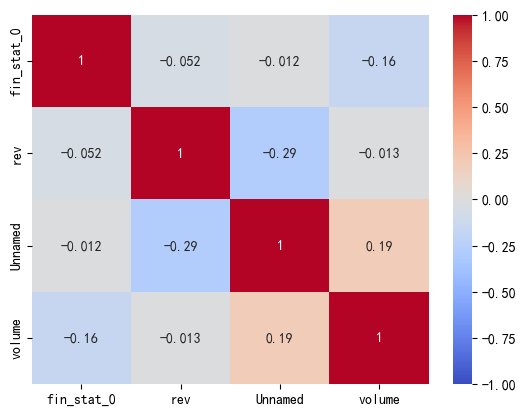

In [15]:
ret, info = managing.view_all_factors(require_return = True)

调整因子入库的标准（夏普率和相关性阈值），更新到config.ini文件中

In [16]:
managing.set_threshold('sharpe',0.4)
managing.set_threshold('corr',0.5)

更新成功
更新成功


打回某个因子，并且留下打回的理由，被打回的因子将被加上DEPRECATED前缀

In [17]:
# managing.rebute('fin_stat_0','缺乏认知深度')

In [18]:
os.listdir('./mysystem/factors/')

['fin_stat_0', 'rev', 'Unnamed', 'volume']

如果上一步打回了，那么打回后重新启动回测系统，会提示研究员进行修改

In [19]:
import pandas as pd
import numpy as np

from mysystem.factor_test import internal_data_loader, factor_constructor, factor_test
from mysystem import managing
from mysystem.portfolio_test import portfolio_backtest, portfolio_construct

# Section 3 投资组合研究

先加载一下因子，默认过滤所有设置为DEPRECATED的因子

In [20]:
features, ret = portfolio_construct.load_features()

初始化一个投资组合

In [21]:
my_portfolio = portfolio_construct.Portfolio(pctdf, features, ret)

按照有效前沿理论找出样本内夏普率最高的组合，其中样本外比例默认为30%，可通过构造函数的可选参数test_set_size修改

In [22]:
my_portfolio.construct_portfolio('effecient_frontier')

展示详细的组合回测结果(detailed=True)

样本外：
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,15.600255,8.351164,1.868034,4.597365


多空组合逐月收益：


month,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,
2022,0.000533,-0.000090,0.002288,0.000983,0.001657,-0.000438,0.000926,0.001794,0.000451,-0.001362


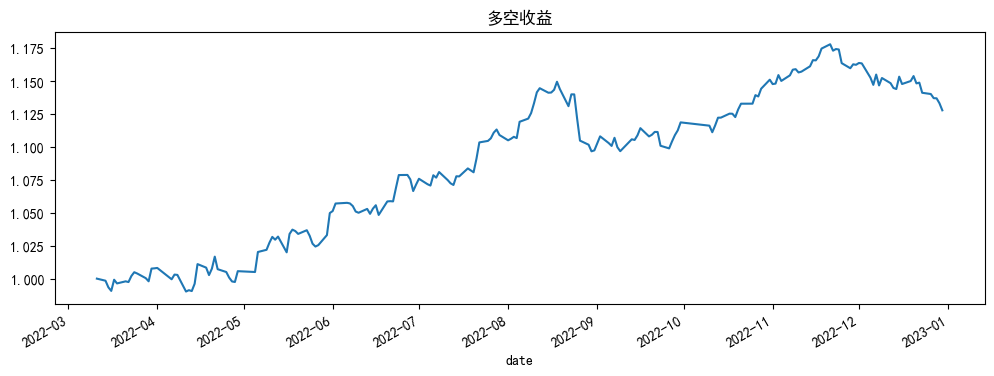

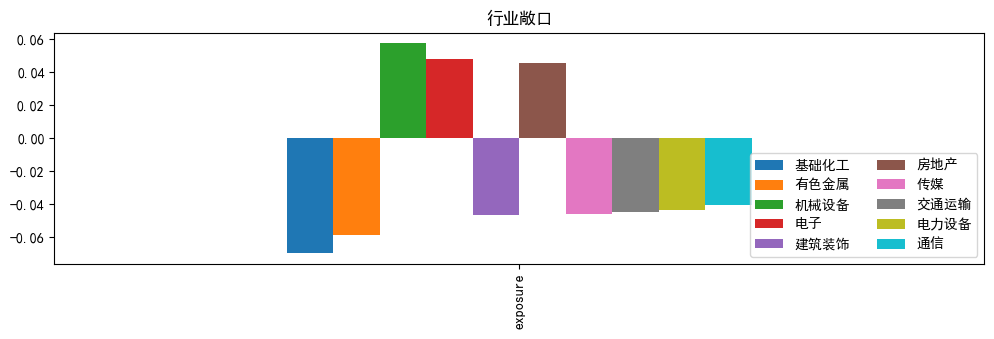

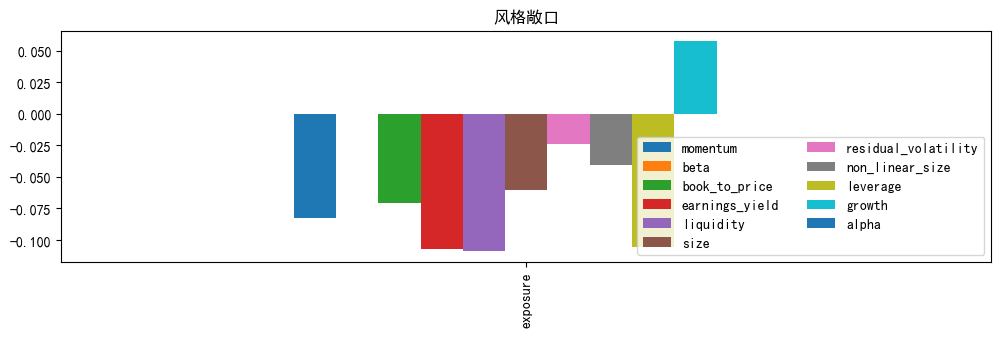

,fin_stat_0,rev,Unnamed,volume
contribution,0.262477,0.161636,0.023829,0.552059


In [23]:
portfolio_backtest.wrapped_portfolio_test(my_portfolio,detailed=True)

发现该组合行业和风格配置都较为均衡

用机器学习的方法构建组合

In [24]:
my_portfolio.construct_portfolio('ml')

展示组合回测结果(detailed=True)

样本外：
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,15.172884,11.762256,1.289964,10.704104


多空组合逐月收益：


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2021,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.000026
2022,0.003487,-0.001049,0.001423,0.004741,-0.002325,-0.000935,-0.000159,0.001179,0.002107,-0.000265,-0.001452,0.000904


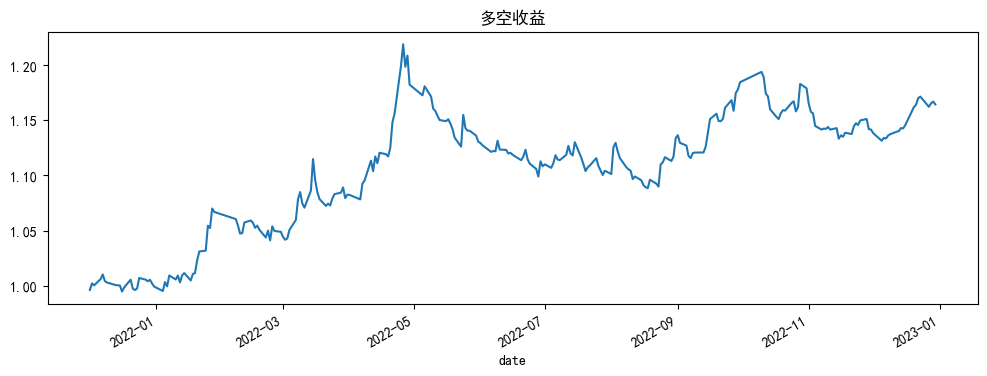

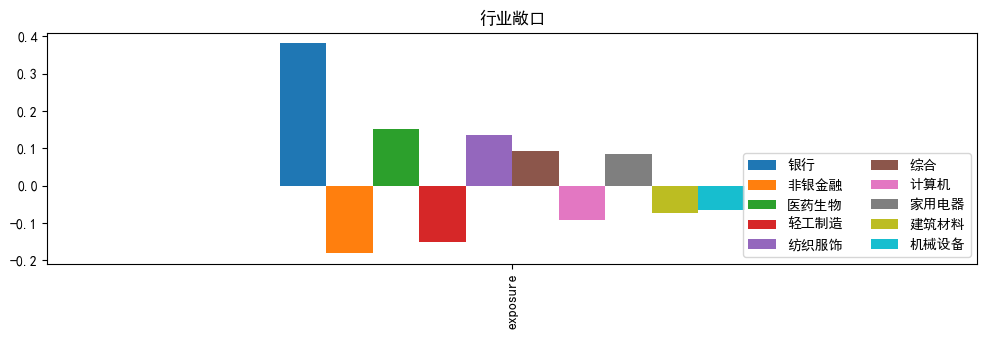

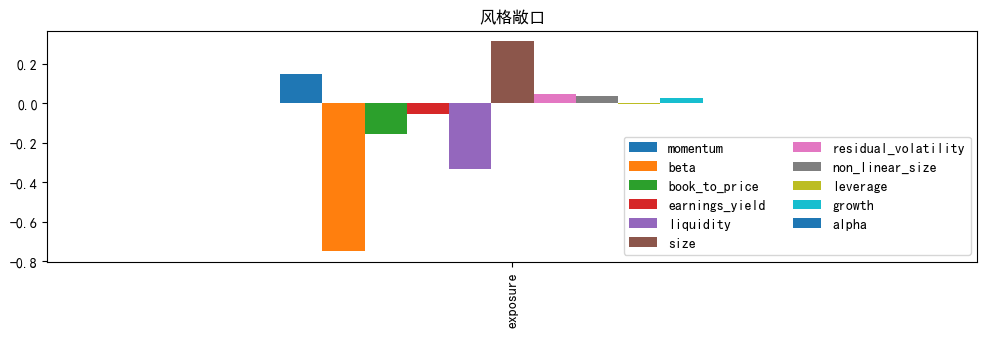

因子贡献：


,fin_stat_0,rev,Unnamed,volume
contribution,0.498445,0.258704,0.161089,0.081762


In [25]:
portfolio_backtest.wrapped_portfolio_test(my_portfolio,detailed=True)

发现该策略严重超配银行，做空beta溢价，存在较大的敞口风险

丢给机器学习之前先用PCA预处理降维一下

In [27]:
my_portfolio.feature_preproc(method='pca', n_components = 3)

正在进行PCA
当前进度0%
当前进度10%
当前进度20%
当前进度30%
当前进度40%
当前进度49%
当前进度59%
当前进度69%
当前进度79%
当前进度89%
当前进度99%


In [28]:
my_portfolio.construct_portfolio('ml')

展示默认的组合回测结果（不显示图表）

In [29]:
portfolio_backtest.wrapped_portfolio_test(my_portfolio)

样本外：
多空组合:


,年化收益(%),年化波动(%),夏普率,回撤(%)
数值,16.448734,8.92861,1.84225,6.10578
